In [2]:
import pandas as pd
import os

In [3]:
df = pd.read_csv("Downloads/PS_20174392719_1491204439457_log.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Few words about the dataset. It is hard to get real world data because of the intrinsically private nature of financial transactions, this dataset was generated using the simulator called PaySim. PaySim uses aggregated data form the private dataset to generate a synthetic dataset that resembles the normal operation. Each step represents an hour of simulation.

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Suprisingly, there is no null values in the dataset.

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Let's check how many Frauds there is in this dataset and what is the percentage of all transactions.

In [8]:
nb_of_frauds = df['isFraud'].sum()
nb_of_transactions = df['isFraud'].count()

frauds_percentage = round((nb_of_frauds/nb_of_transactions) * 100,2)

print(f"In this dataset the number of frauds is equal to: {nb_of_frauds}")
print(f"This is the {frauds_percentage}% of all of the transactions.")

In this dataset the number of frauds is equal to: 8213
This is the 0.13% of all of the transactions.


This means that the dataset is strongly imbalanced and we need to bear it in mind while we will fit the data into the model.

In [9]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

We have here five transaction types. Let's plot the distribution of frauds and non-frauds for every transaction type.

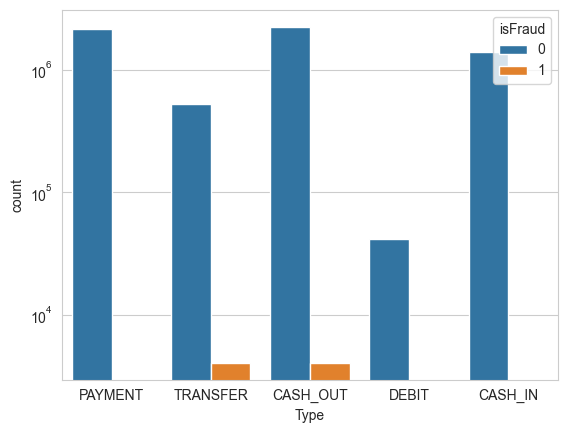

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def countplot(df):
    sns.set_style('whitegrid')
    countplot = sns.countplot(data=df, x = 'type', hue = 'isFraud')
    countplot.set_xlabel('Type')
    countplot.set_ylabel('count')
    countplot.set_yscale('log')
    plt.show()

countplot(df)

The frauds are made only within the transaction types 'TRANSFER' and 'CASH_OUT'.

In [12]:
def histplot_f(data):
    histplot = sns.histplot(data=df[:100000],
                            x='amount',
                            hue='isFraud',
                            kde=True,
                            log_scale=True)
    histplot.set_ylabel('Number of Observations')
    histplot.set_xlabel('amount')
    mean_value_nonfrauds = df[df['isFraud']==False]['amount'].mean()
    mean_value_frauds = df[df['isFraud']==True]['amount'].mean()
    histplot.axvline(x=mean_value_nonfrauds, color = 'green')
    histplot.axvline(x=mean_value_frauds, color = 'red')
    histplot.annotate(f'Mean amount for nonfraud transactions: {mean_value_nonfrauds:,.2f}',
                  xy=(0.7, 0.9),          
                  xycoords='axes fraction', 
                  fontsize=12,             
                  color='green',             
                  ha='center')             
    histplot.annotate(f'Mean amount for fraud transactions: {mean_value_frauds:,.2f}',
                  xy=(0.5, 0.5),          
                  xycoords='axes fraction', 
                  fontsize=12,             
                  color='red',             
                  ha='center')
    plt.show()
        

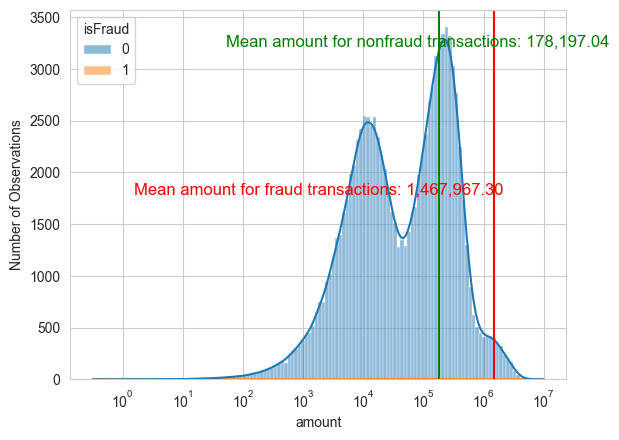

In [13]:
histplot_f(df)

As we can see, the average amount of fraudulent transactions is much higher than in the non fraudulent transactions.

As we saw above, the 'type' column includes categorical, nominal data which can be transformed into numerical values using OneHotEncoder method.

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

encoder_transform = encoder.fit_transform(df[['type']])

encoder_transform


,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
6362615,0.0,1.0,0.0,0.0,0.0
6362616,0.0,0.0,0.0,0.0,1.0
6362617,0.0,1.0,0.0,0.0,0.0
6362618,0.0,0.0,0.0,0.0,1.0


Now we have as an output a new pandas DataFrame which we need to combine with our previous DataFrame. 

In [15]:
df = pd.concat([encoder_transform, df], axis = 1).drop(columns = 'type')
df.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,0.0,0.0,1.0,0.0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,0.0,0.0,0.0,1.0,0.0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,1.0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,0.0,1.0,0.0,0.0,0.0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,0.0,0.0,0.0,1.0,0.0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
df.drop(columns = ['nameOrig','nameDest'], axis = 1, inplace=True)

In [17]:
columns = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT','type_TRANSFER',
           'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Decision Tree Classifier

In [18]:
features = ['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','step',
     'amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

target = ['isFraud']

X = df[features]
y = df[target]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1111)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

y_train.shape

Training set size: 5090096 samples
Test set size: 1272524 samples


(5090096, 1)

In [21]:
# I need to convert y_train variable to a 1D array, now it is 2D

y_train = y_train.to_numpy().reshape(-1)

In [22]:
y_train.shape

(5090096,)

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [25]:
y_pred_dt = model.predict(X_test)

Let's now check the evaluation metrics: Accuracy, Precision and Recall. 

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt)

0.9997108109552354

In [27]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_dt)

0.8952847519902021

In [28]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_dt)

0.8812537673297167

Also, we can have a look on the Confusion Matrix.

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dt, labels = [1,0])

array([[   1462,     197],
       [    171, 1270694]])

The Accuracy, Precision and Recall using Decision Tree Classifier are good, now I will check if they can perform better using other algorithms. 

# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=42, n_jobs = -1)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [31]:
y_pred_rf = rfc.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_rf)

0.9996534446501598

In [33]:
precision_score(y_test, y_pred_rf)

0.9943181818181818

In [34]:
recall_score(y_test, y_pred_rf)

0.7383966244725738

In [35]:
confusion_matrix(y_test, y_pred_rf, labels = [1,0])

array([[   1225,     434],
       [      7, 1270858]])

The accuracy is almost the same as for Decision Tree Classifier, but the precision is significantly better, which means that the majority of frauds will be correctly labelled as frauds (true positives) and only a small fraction of them will be labelled incorrectly as positives (false positives). Precision in case of fraud detection is more important than recall, because we have small amount of false positives which means that it is unlikely to label a non-fraud as a fraud. On the other hand, recall is also important because it will tell us how many frauds we have missed and did not detect them. So both are equally important and here recall is too low. 

# Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gbc = GradientBoostingClassifier(random_state=42)

In [43]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [44]:
y_pred_gbc = gbc.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred_gbc)

0.9989705498678217

In [46]:
precision_score(y_test, y_pred_gbc)

0.7135862913096696

In [47]:
recall_score(y_test, y_pred_gbc)

0.351416515973478

In [62]:
confusion_matrix(y_test, y_pred_gbc, labels = [1,0])

array([[    583,    1076],
       [    234, 1270631]])

Gradient Boosting Classifier gave the worst evaluation metrics values, now I will try XG Boost Classifier which is designed to work with a big datasets.

# XGBoost Classifier

In [51]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [53]:
import xgboost as xgb

In [55]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, n_jobs=-1, use_label_encoder=False)

In [57]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_predict_xgb = xgb_model.predict(X_test)

In [59]:
accuracy_score(y_test, y_predict_xgb)

0.9997603188623554

In [60]:
precision_score(y_test, y_predict_xgb)

0.9643347050754458

In [61]:
recall_score(y_test, y_predict_xgb)

0.8474984930681133

In [64]:
confusion_matrix(y_test, y_predict_xgb, labels = [1,0])

array([[   1406,     253],
       [     52, 1270813]])

Summary: XG Boost Classifier, gives not only high accuracy and precision, but also acceptable recall. It means that almost 85% of frauds will be detected by the algorithm. This is a reasonable number proving that the XG Boost Classifier would be the best option for fraud detection. 